<a href="https://colab.research.google.com/github/Ximenaloranca/Ecuaciones-Diferenciales-Parciales-/blob/main/Ecuacion%20de%20onda.%20Metodo%20explicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coeficiente Lambda calculado: 1.0
✅ ¡Cálculo terminado con éxito!


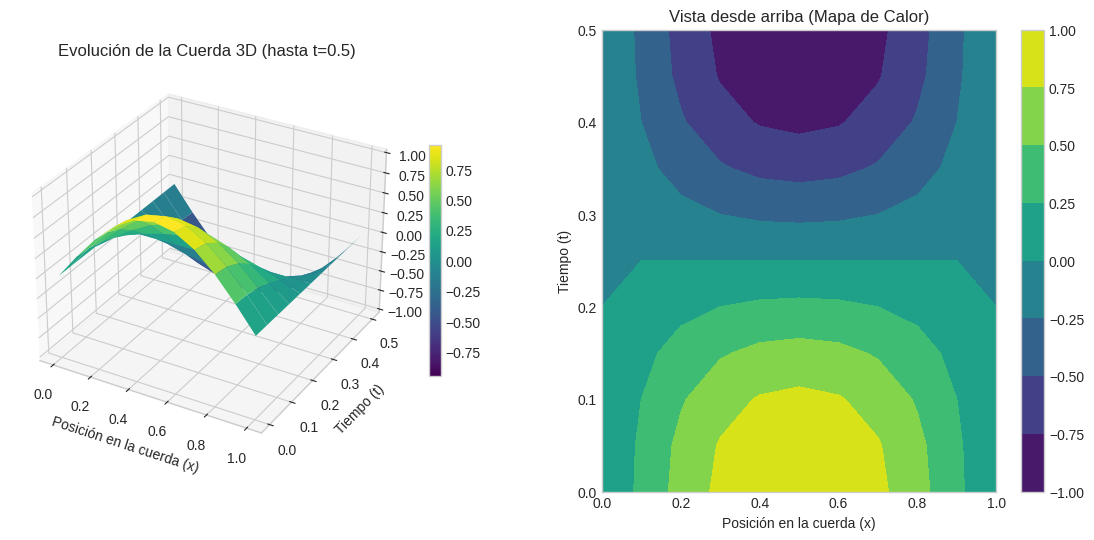


📊 TABLA DE RESULTADOS EN T=1.0
+--------------+-------------+---------------+----------+----------+
|   Posición X |   Tu Código |   Tabla Libro |   Exacta |    Error |
+==============+=============+===============+==========+==========+
|          0   |    0        |      0        | 0        | 0        |
+--------------+-------------+---------------+----------+----------+
|          0.1 |    0.309017 |      0.309017 | 0.309017 | 5.55e-17 |
+--------------+-------------+---------------+----------+----------+
|          0.2 |    0.587785 |      0.587785 | 0.587785 | 2.22e-16 |
+--------------+-------------+---------------+----------+----------+
|          0.3 |    0.809017 |      0.809017 | 0.809017 | 0        |
+--------------+-------------+---------------+----------+----------+
|          0.4 |    0.951057 |      0.951057 | 0.951057 | 3.33e-16 |
+--------------+-------------+---------------+----------+----------+
|          0.5 |    1        |      1        | 1        | 0        |
+-

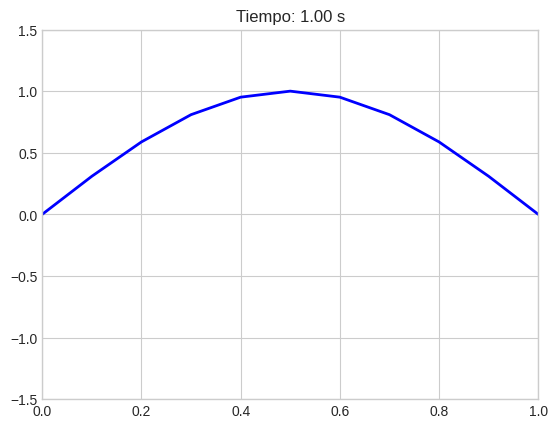

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from tabulate import tabulate
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ==========================================
# PARTE 1: CONFIGURACIÓN DE LA "CUERDA" Y EL TIEMPO
# ==========================================

# Datos físicos del problema
longitud_cuerda = 1.0           # Cuánto mide la cuerda (L)
tiempo_total = 1.0              # Hasta qué segundo queremos simular
velocidad_onda = 2.0            # Qué tan rápido viaja la onda (alpha)

# Tamaño de los "pasitos"
paso_espacio = 0.1              # Distancia entre puntos de la cuerda (dx o h)
paso_tiempo = 0.05              # Cada cuánto tomamos una "foto" (dt o k)

# Cálculo de Lambda (Factor de estabilidad)
# Lambda = (velocidad * dt) / dx
lambda_coeficiente = (velocidad_onda * paso_tiempo) / paso_espacio

print(f"Coeficiente Lambda calculado: {lambda_coeficiente}")

# Crear las coordenadas (la regla para medir)
# Puntos en la cuerda: 0, 0.1, 0.2 ... 1.0
coordenadas_x = np.arange(0, longitud_cuerda + 0.001, paso_espacio)
# Instantes de tiempo: 0, 0.05, 0.10 ... 1.0
coordenadas_t = np.arange(0, tiempo_total + 0.001, paso_tiempo)

num_puntos_espacio = len(coordenadas_x)  # Cuántos puntos tiene la cuerda (11)
num_pasos_tiempo = len(coordenadas_t)    # Cuántas fotos tomaremos (21)

# Matriz gigante para guardar los resultados
# Filas = Tiempo, Columnas = Posición en la cuerda
matriz_solucion = np.zeros((num_pasos_tiempo, num_puntos_espacio))


# ==========================================
# PARTE 2: EL MOTOR MATEMÁTICO (Cálculo)
# ==========================================

# A. CONDICIÓN INICIAL (El momento t=0)
# La cuerda empieza con forma de seno: u(x,0) = sin(pi * x)
for i in range(num_puntos_espacio):
    matriz_solucion[0, i] = np.sin(np.pi * coordenadas_x[i])

# B. PRIMER PASO (El momento t=1)
# Usamos una fórmula especial porque al inicio la cuerda no se mueve (velocidad inicial 0).
# Fórmula simplificada: Futuro = (1 - lambda^2)*Presente + 0.5*lambda^2*(Vecinos)
for i in range(1, num_puntos_espacio - 1):
    u_presente = matriz_solucion[0, i]
    u_vecino_izq = matriz_solucion[0, i-1]
    u_vecino_der = matriz_solucion[0, i+1]

    matriz_solucion[1, i] = (1 - lambda_coeficiente**2) * u_presente + \
                            0.5 * lambda_coeficiente**2 * (u_vecino_der + u_vecino_izq)

# C. EL RESTO DEL TIEMPO (Bucle principal t > 1)
# Aquí la fórmula usa el Pasado, Presente y Vecinos para predecir el Futuro.
for j in range(1, num_pasos_tiempo - 1): # j es el reloj avanzando
    for i in range(1, num_puntos_espacio - 1): # i es recorriendo la cuerda

        u_presente = matriz_solucion[j, i]
        u_pasado   = matriz_solucion[j-1, i]
        u_vecino_izq = matriz_solucion[j, i-1]
        u_vecino_der = matriz_solucion[j, i+1]

        # Fórmula explicita de la onda
        termino_central = 2 * (1 - lambda_coeficiente**2) * u_presente
        termino_vecinos = lambda_coeficiente**2 * (u_vecino_der + u_vecino_izq)

        # Futuro = (Central + Vecinos) - Pasado
        matriz_solucion[j+1, i] = termino_central + termino_vecinos - u_pasado

print("✅ ¡Cálculo terminado con éxito!")


# ==========================================
# PARTE 3: VISUALIZACIÓN (Gráficas)
# ==========================================

# Recortamos datos para graficar solo hasta t=0.5 (mitad del tiempo)
indice_mitad = int(0.5 / paso_tiempo)
u_recortada = matriz_solucion[:indice_mitad+1, :]
t_recortado = coordenadas_t[:indice_mitad+1]

# Preparamos malla 3D
X, T = np.meshgrid(coordenadas_x, t_recortado)

fig = plt.figure(figsize=(14, 6))

# Gráfica 3D
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, T, u_recortada, cmap=cm.viridis)
ax1.set_title('Evolución de la Cuerda 3D (hasta t=0.5)')
ax1.set_xlabel('Posición en la cuerda (x)')
ax1.set_ylabel('Tiempo (t)')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Mapa de Calor 2D
ax2 = fig.add_subplot(1, 2, 2)
cont = ax2.contourf(X, T, u_recortada, cmap=cm.viridis)
ax2.set_title('Vista desde arriba (Mapa de Calor)')
ax2.set_xlabel('Posición en la cuerda (x)')
ax2.set_ylabel('Tiempo (t)')
fig.colorbar(cont, ax=ax2)

plt.show()


# ==========================================
# PARTE 4: TABLA COMPARATIVA (Ejercicio 2 y 3)
# ==========================================

# Queremos comparar justo en el paso 20 (que es t=1.0)
paso_a_comparar = 20

# Valores copiados de la imagen que subiste (Tabla 12.6)
valores_tabla_imagen = [
    0.0000000000, 0.3090169944, 0.5877852523, 0.8090169944, 0.9510565163,
    1.0000000000, 0.9510565163, 0.8090169944, 0.5877852523, 0.3090169944,
    0.0000000000
]

datos_para_tabla = []

for i in range(num_puntos_espacio):
    # 1. Nuestro cálculo
    val_calculado = matriz_solucion[paso_a_comparar, i]

    # 2. Valor del libro/imagen
    val_libro = valores_tabla_imagen[i]

    # 3. Solución Exacta Matemática: u = sin(pi*x) * cos(2pi*t)
    # Como t=1.0, cos(2pi) es 1. Entonces queda solo sin(pi*x)
    val_exacto = np.sin(np.pi * coordenadas_x[i]) * np.cos(2 * np.pi * 1.0)

    # 4. Error (Diferencia)
    error = abs(val_calculado - val_exacto)

    datos_para_tabla.append([
        f"{coordenadas_x[i]:.1f}",
        f"{val_calculado:.8f}",
        f"{val_libro:.8f}",
        f"{val_exacto:.8f}",
        f"{error:.2e}"
    ])

print("\n📊 TABLA DE RESULTADOS EN T=1.0")
headers = ["Posición X", "Tu Código", "Tabla Libro", "Exacta", "Error"]
print(tabulate(datos_para_tabla, headers=headers, tablefmt="grid"))


# ==========================================
# PARTE 5: ANIMACIÓN (Video)
# ==========================================

fig_anim, ax_anim = plt.subplots()
ax_anim.set_xlim(0, 1)
ax_anim.set_ylim(-1.5, 1.5)
ax_anim.set_title("Animación de la Onda")
ax_anim.grid(True)

linea, = ax_anim.plot([], [], 'b-', lw=2, label='Cuerda')

def init():
    linea.set_data([], [])
    return (linea,)

def animar(i):
    # En cada cuadro 'i', sacamos toda la fila de la matriz
    y_data = matriz_solucion[i, :]
    linea.set_data(coordenadas_x, y_data)
    ax_anim.set_title(f"Tiempo: {coordenadas_t[i]:.2f} s")
    return (linea,)

anim = FuncAnimation(fig_anim, animar, init_func=init,
                     frames=num_pasos_tiempo, interval=100, blit=True)

HTML(anim.to_jshtml())

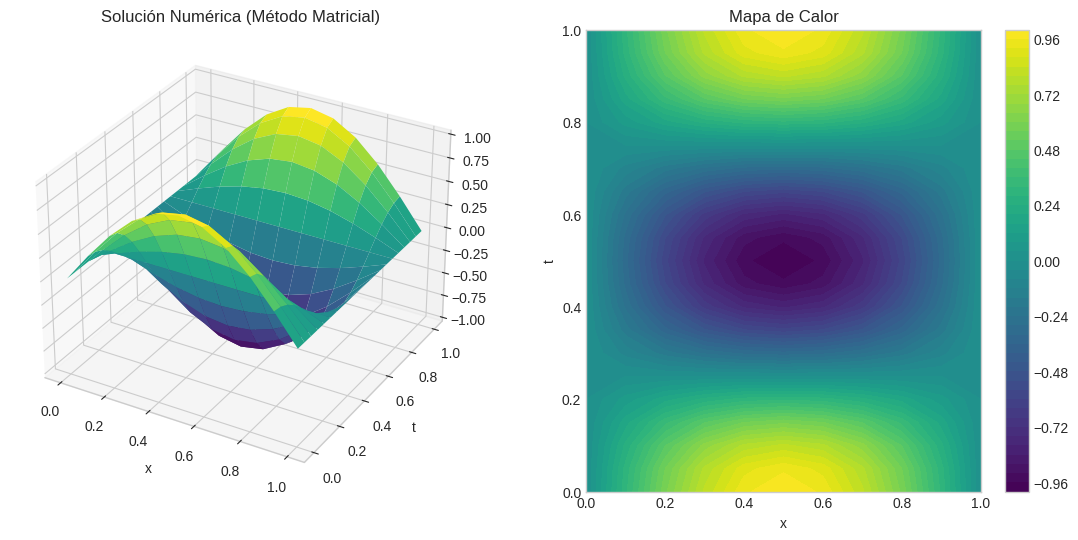


--- COMPARACIÓN EN T=1.0 ---
+-----+-------------------+----------------+----------+----------+
|   x |   Tu Código (A*S) |   Tabla Imagen |   Exacta |    Error |
+=====+===================+================+==========+==========+
| 0   |          0        |       0        | 0        | 0        |
+-----+-------------------+----------------+----------+----------+
| 0.1 |          0.309017 |       0.309017 | 0.309017 | 5.55e-17 |
+-----+-------------------+----------------+----------+----------+
| 0.2 |          0.587785 |       0.587785 | 0.587785 | 4.44e-16 |
+-----+-------------------+----------------+----------+----------+
| 0.3 |          0.809017 |       0.809017 | 0.809017 | 0        |
+-----+-------------------+----------------+----------+----------+
| 0.4 |          0.951057 |       0.951057 | 0.951057 | 1.11e-16 |
+-----+-------------------+----------------+----------+----------+
| 0.5 |          1        |       1        | 1        | 0        |
+-----+-------------------+-----

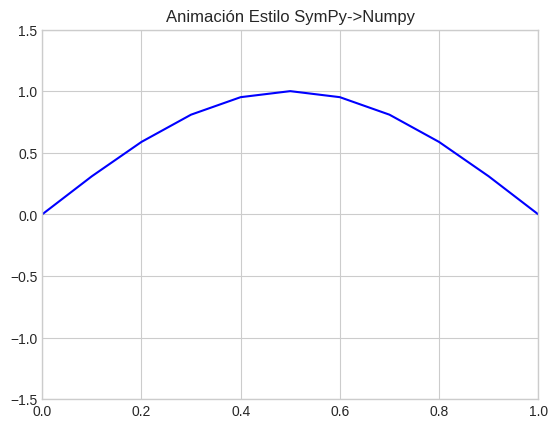

In [53]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from tabulate import tabulate
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- 1. DEFINICIÓN DE FUNCIONES (Estilo de tu notebook) ---

def f(x):
    # Condición inicial u(x,0) = sin(pi*x)
    return np.sin(np.pi * x)

def tridiagonal(n, a, b):
    # Genera la matriz tridiagonal como en tu archivo [cite: 6]
    return sp.Matrix([
        [a if i == j else b if abs(i-j)==1 else 0 for j in range(n)]
        for i in range(n)
    ])

def onda(A, u0, u1, j):
    # Función iterativa idéntica a tu archivo [cite: 16]
    u0 = sp.Matrix(u0)
    u1 = sp.Matrix(u1)
    S = [u0, u1]

    for n in range(2, j + 1): # Iteramos hasta j
        # La fórmula matricial explícita: U_futuro = A*U_presente - U_pasado
        sol = A * S[n-1] - S[n-2]
        S.append(sol)

    # Convertimos a matriz y transponemos para tener [tiempo, espacio]
    return sp.Matrix([s.T for s in S])

# --- 2. CONFIGURACIÓN DEL PROBLEMA ---

# Parámetros físicos
h = 0.1
k = 0.05
alpha = 2.0  # Raíz de 4

# Cálculo de r (Lambda cuadrada en este contexto)
# r = (alpha * k / h)^2 = (2 * 0.05 / 0.1)^2 = 1^2 = 1
r = 1.0

# Número de puntos INTERIORES (sin contar 0 y 1 porque valen 0)
# x = 0.1, 0.2, ..., 0.9 -> Son 9 puntos
n_puntos = 9

# --- 3. CREACIÓN DE MATRICES Y VECTORES (Estilo source 7-15) ---

# Creamos la matriz A
# Diagonal = 2(1-r), Vecinos = r
# Como r=1, Diagonal=0, Vecinos=1. Coincide con tu notebook tridiagonal(9, 2-2*r, r)
A = tridiagonal(n_puntos, 2 - 2*r, r)

# Vector inicial u0 (t=0)
# Puntos interiores: 0.1, 0.2 ... 0.9
x_interior = [0.1 * (i + 1) for i in range(n_puntos)]
u0 = sp.Matrix([f(val) for val in x_interior])

# Vector u1 (t=1)
# ¡OJO! Aquí cambia un poco respecto a tu notebook original porque du/dt = 0
# Usamos la fórmula de D'Alembert discretizada para el primer paso con velocidad 0:
# u1 = 0.5 * A * u0 + u0 (pero como diagonal de A es 0, es el promedio de vecinos)
# Calculamos u1 numéricamente para pasárselo a la función
u1_vals = []
u0_lista = [float(val) for val in u0]
for i in range(n_puntos):
    val_izq = 0 if i == 0 else u0_lista[i-1]
    val_der = 0 if i == n_puntos-1 else u0_lista[i+1]
    # Fórmula primer paso con lambda=1: u1 = 0.5 * (u_izq + u_der)
    u1_vals.append(0.5 * (val_izq + val_der))

u1 = sp.Matrix(u1_vals)

# --- 4. SOLUCIÓN (Estilo source 18) ---

j = 20 # Queremos llegar a t=1.0 (20 pasos de 0.05)
U = onda(A, u0, u1, j)

# Convertir a Numpy para graficar y tabular (Estilo source 19)
# Agregamos los ceros de las fronteras (x=0 y x=1) manualmente
U_interior = np.array(U.tolist(), dtype=float)
filas, cols = U_interior.shape
zeros_col = np.zeros((filas, 1))
U_np = np.hstack((zeros_col, U_interior, zeros_col)) # [0, datos, 0]


# ==========================================
# RESULTADOS Y EJERCICIOS
# ==========================================

# Malla completa para gráficas (0 a 1)
x = np.linspace(0, 1, n_puntos + 2) # 11 puntos (0.0 a 1.0)
t = np.linspace(0, 1, j + 1)        # 21 tiempos (0.0 a 1.0)
X, T_grid = np.meshgrid(x, t)

# --- EJERCICIO 1: GRÁFICAS ---
fig = plt.figure(figsize=(14, 6))

# 3D
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, T_grid, U_np, cmap=cm.viridis)
ax1.set_title('Solución Numérica (Método Matricial)')
ax1.set_xlabel('x')
ax1.set_ylabel('t')

# 2D
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(X, T_grid, U_np, levels=50, cmap=cm.viridis)
plt.colorbar(contour)
ax2.set_title('Mapa de Calor')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
plt.show()

# --- EJERCICIO 2 y 3: TABLA COMPARATIVA ---
# Valores de la imagen (Tabla 12.6)
vals_tabla_img = [0.0, 0.30901699, 0.58778525, 0.80901699, 0.95105652,
                  1.0, 0.95105652, 0.80901699, 0.58778525, 0.30901699, 0.0]

datos_tabla = []
paso_final = 20 # t=1.0

for i in range(len(x)):
    val_num = U_np[paso_final, i]
    val_exacta = np.sin(np.pi * x[i]) * np.cos(2 * np.pi * 1.0)
    err = abs(val_num - val_exacta)

    datos_tabla.append([
        f"{x[i]:.1f}",
        f"{val_num:.8f}",
        f"{vals_tabla_img[i]:.8f}",
        f"{val_exacta:.8f}",
        f"{err:.2e}"
    ])

print("\n--- COMPARACIÓN EN T=1.0 ---")
print(tabulate(datos_tabla, headers=["x", "Tu Código (A*S)", "Tabla Imagen", "Exacta", "Error"], tablefmt="grid"))

# --- EJERCICIO 4: ANIMACIÓN ---
fig_anim, ax_anim = plt.subplots()
ax_anim.set_xlim(0, 1)
ax_anim.set_ylim(-1.5, 1.5)
ax_anim.set_title("Animación Estilo SymPy->Numpy")
linea, = ax_anim.plot([], [], 'b-')

def init():
    linea.set_data([], [])
    return (linea,)

def animate(i):
    linea.set_data(x, U_np[i, :])
    return (linea,)

anim = FuncAnimation(fig_anim, animate, init_func=init, frames=len(t), interval=100, blit=True)
HTML(anim.to_jshtml())